In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Position scales for continuous data (x & y)

**`scale_x_continuous()`** and **`scale_y_continuous()`** are the default scales for continuous x and y aesthetics.  
There are three variants that set the trans argument for commonly used transformations: 
* `scale_*_log10()`
* `scale_*_sqrt()`
* `scale_*_reverse()`

```R
scale_x_continuous(
  name = waiver(),
  breaks = waiver(),
  minor_breaks = waiver(),
  n.breaks = NULL,
  labels = waiver(),
  limits = NULL,
  expand = waiver(),
  oob = censor,
  na.value = NA_real_,
  trans = "identity",
  guide = waiver(),
  position = "bottom",
  sec.axis = waiver()
)

scale_y_continuous(
  name = waiver(),
  breaks = waiver(),
  minor_breaks = waiver(),
  n.breaks = NULL,
  labels = waiver(),
  limits = NULL,
  expand = waiver(),
  oob = censor,
  na.value = NA_real_,
  trans = "identity",
  guide = waiver(),
  position = "left",
  sec.axis = waiver()
)

scale_x_log10(...)

scale_y_log10(...)

scale_x_reverse(...)

scale_y_reverse(...)

scale_x_sqrt(...)

scale_y_sqrt(...)
```

# Arguments

<b><a href = 'https://ggplot2.tidyverse.org/reference/scale_continuous.html'>Documentation</a></b>

# Examples

In [2]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [3]:
tips <- read.csv('./tips.csv')
head(tips)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


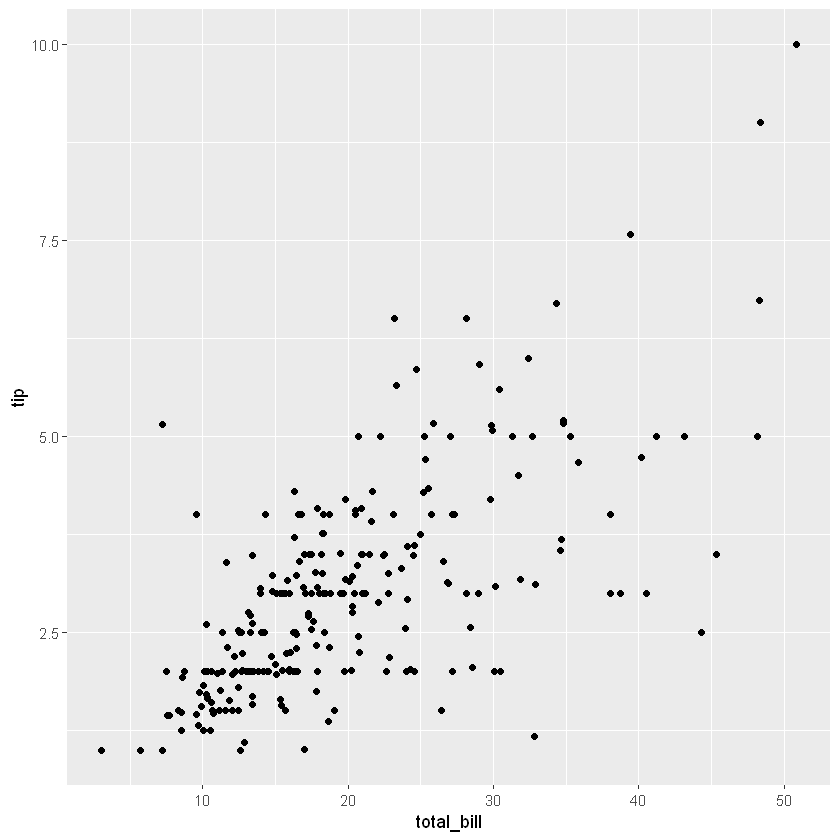

In [4]:

plot <- ggplot(tips, aes(total_bill, tip)) + geom_point()
plot

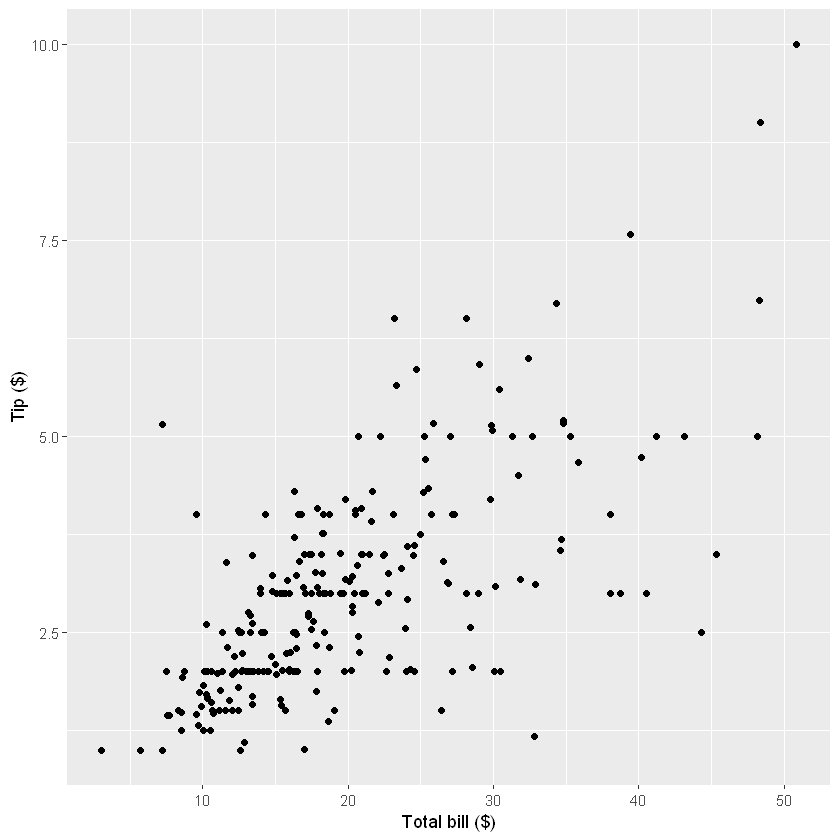

In [5]:
# Manipulating the default position scales lets you:
#  * change the axis labels
plot + 
scale_x_continuous('Total bill ($)') + #set x-axis label  
scale_y_continuous('Tip ($)') #slet y-axis label

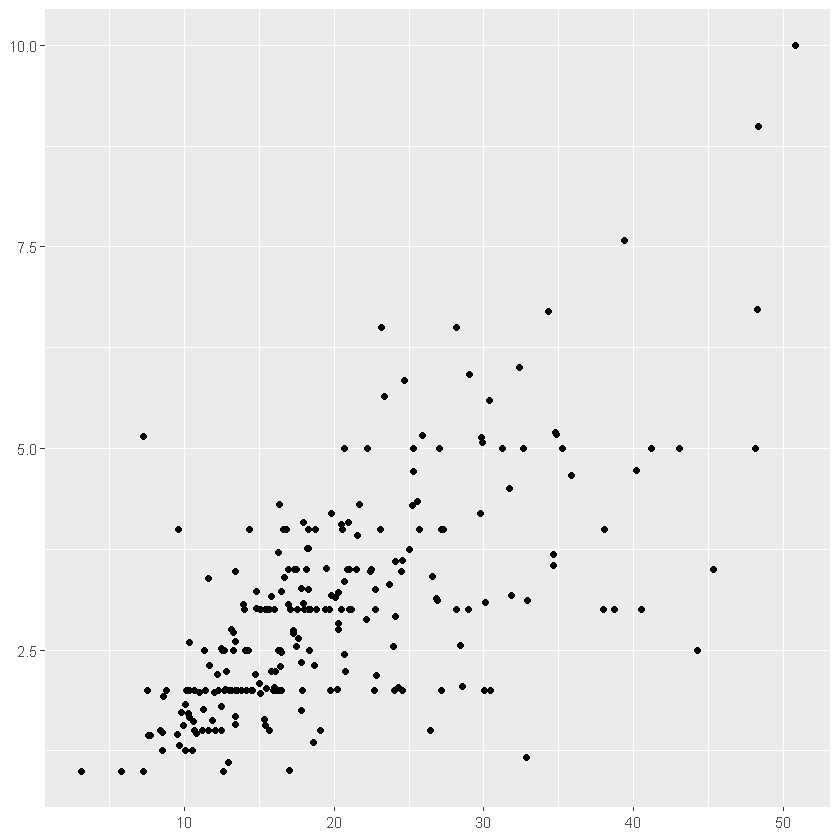

In [6]:
plot + labs(x = NULL, y = NULL)

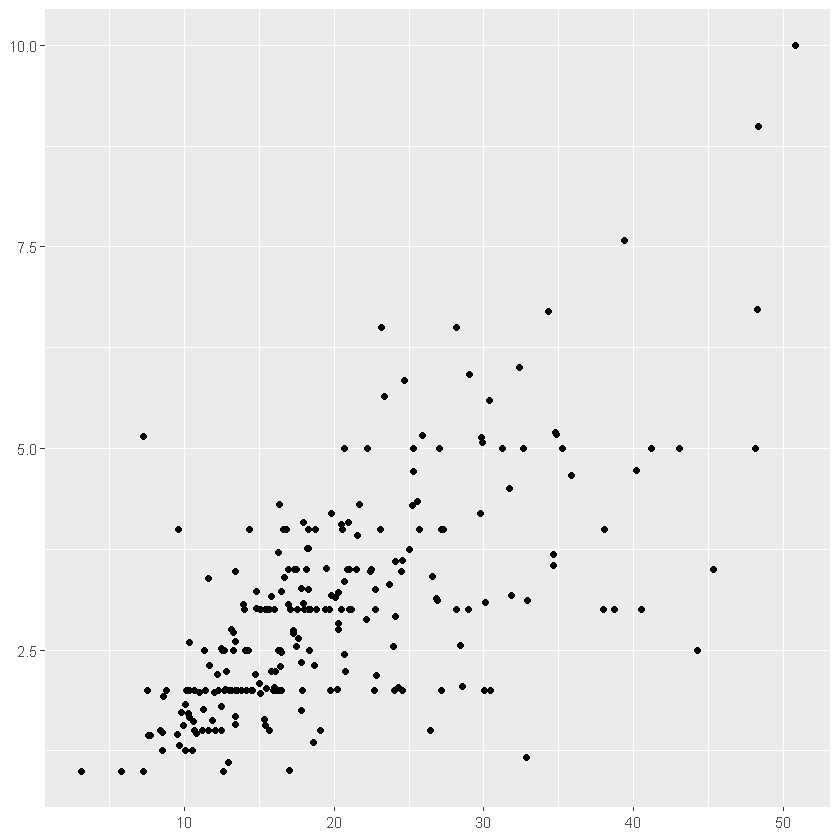

In [7]:
# You can also use the short-cut labs().
# Use NULL to suppress axis labels

plot + labs(x = NULL, y = NULL)

Warning message:
"Removed 49 rows containing missing values (geom_point)."

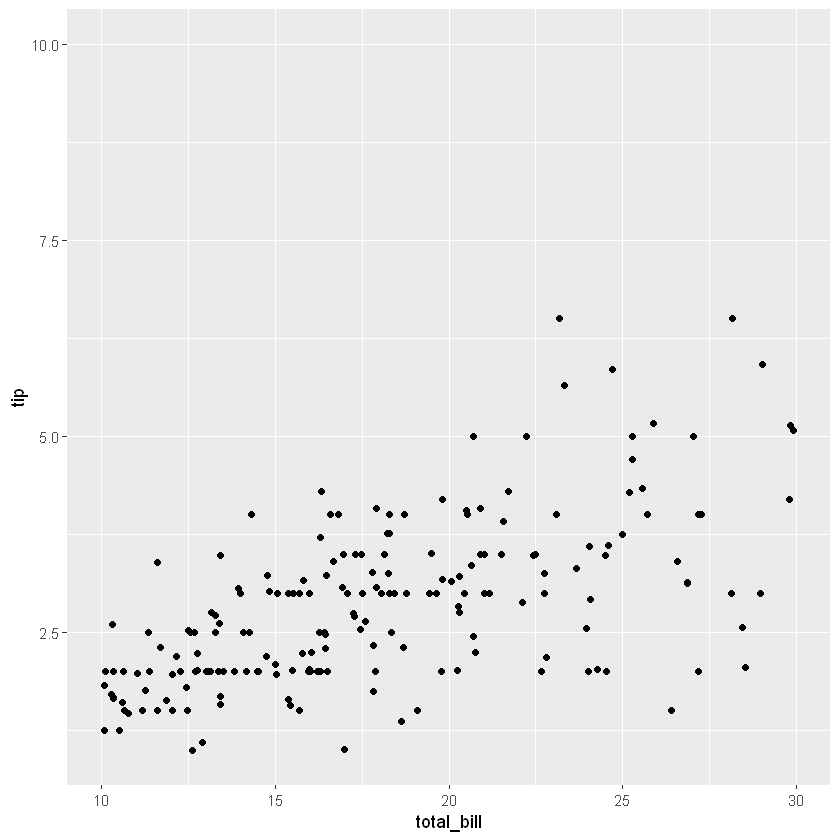

In [8]:
#  * modify the axis limits (removing values outside of limit)

plot + scale_x_continuous(limits = c(10, 30)) 
#equivalent, use short-hand:
#plot + xlim(10, 30)

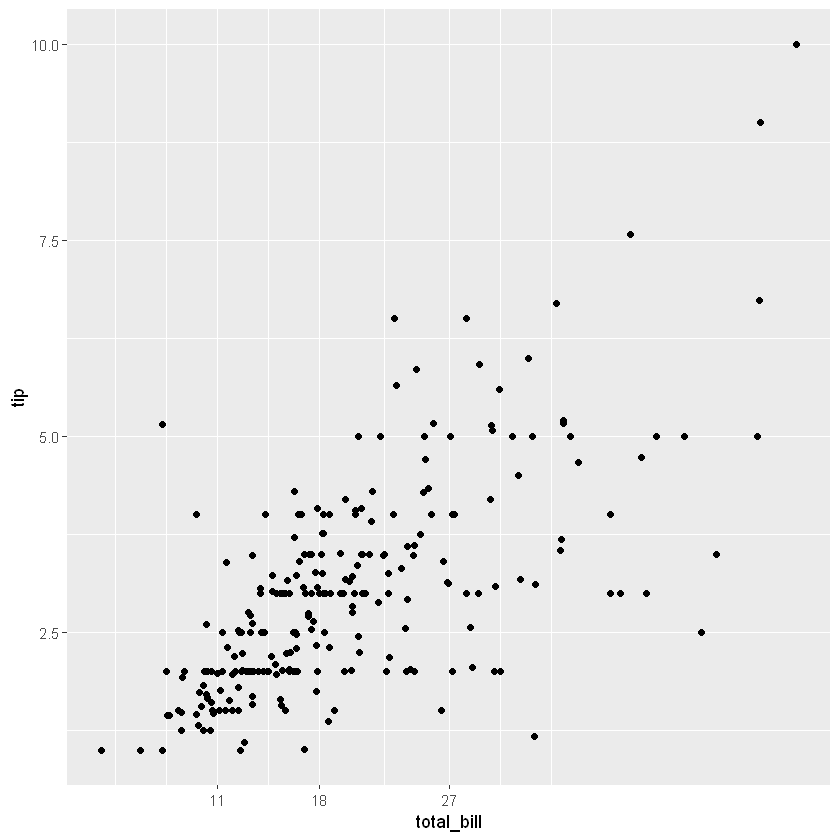

In [9]:
#  * choose where the ticks appear: let set_xticks, set_yticks in MATPLOTLIB
plot + scale_x_continuous(breaks = c(11, 18, 27))

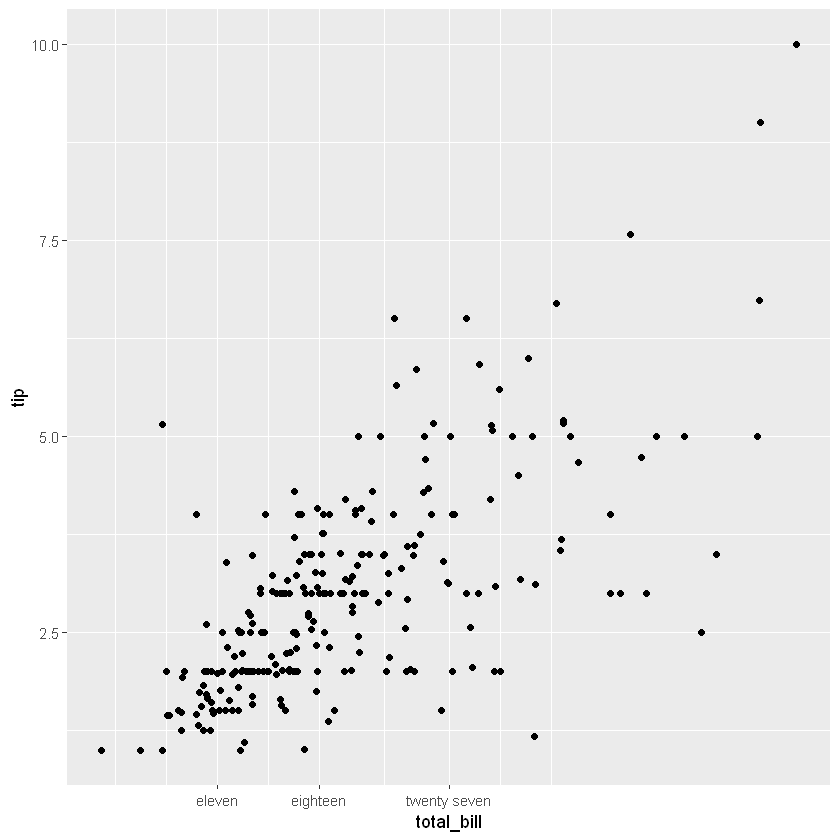

In [10]:
#set your own labels: set_xticklabels, set_yticklabels in MATPLOTLIB
plot + 
scale_x_continuous(
    breaks = c(11, 18, 27), 
    labels = c('eleven', 'eighteen', 'twenty seven')  #set_xticklabels
)

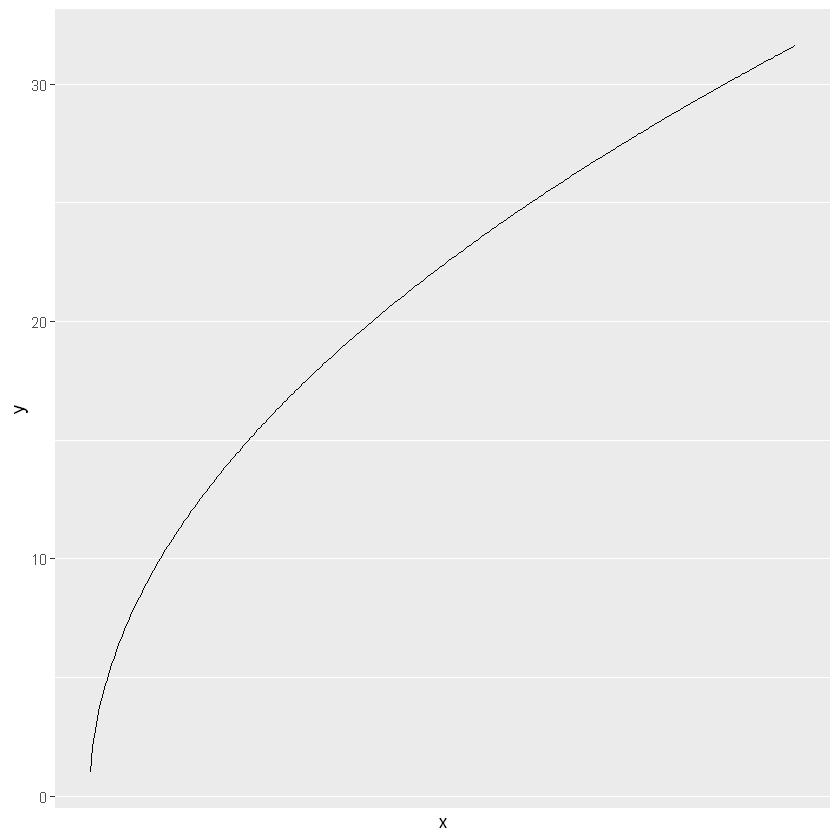

In [19]:
#turn off xticks (this will also result in turn off xticklabels)
plot + scale_x_continuous(breaks = NULL)

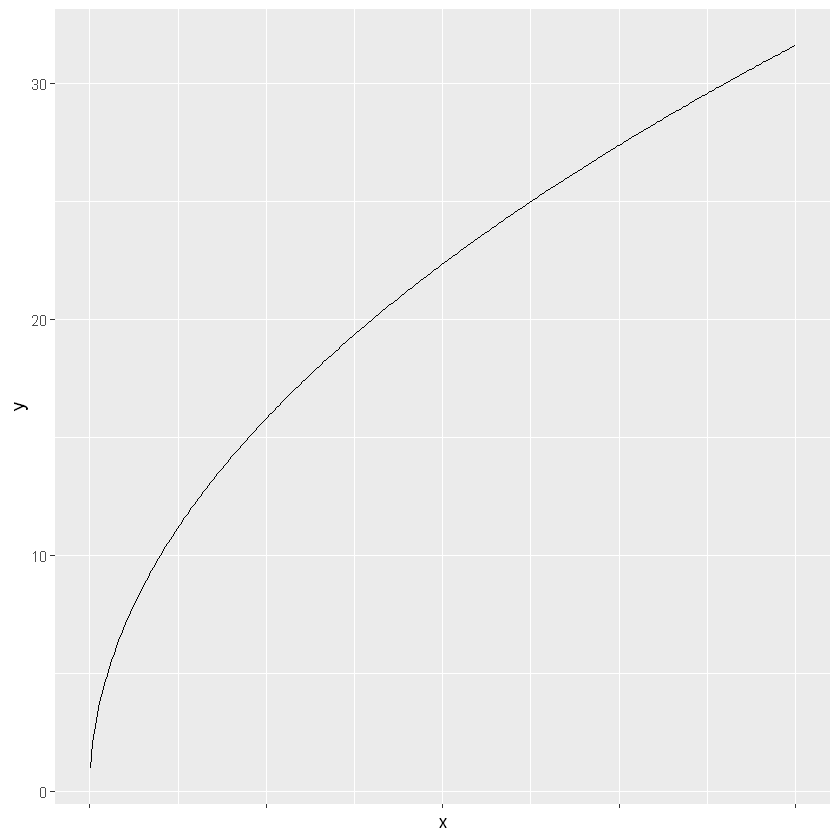

In [18]:
#turn off xticklabels
plot + scale_x_continuous(labels = NULL)

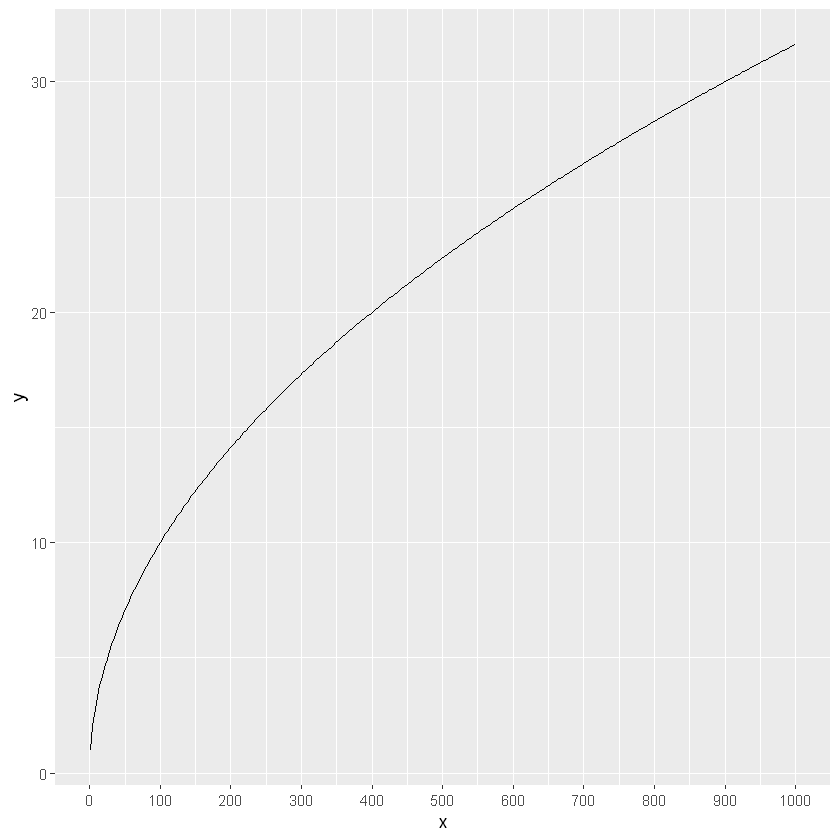

In [21]:
#chosing number of xticks, yticks: n.breaks
plot + 
scale_x_continuous(n.breaks = 10) #10 x ticks

In [ ]:
#Control minor ticks via: minor_breaks

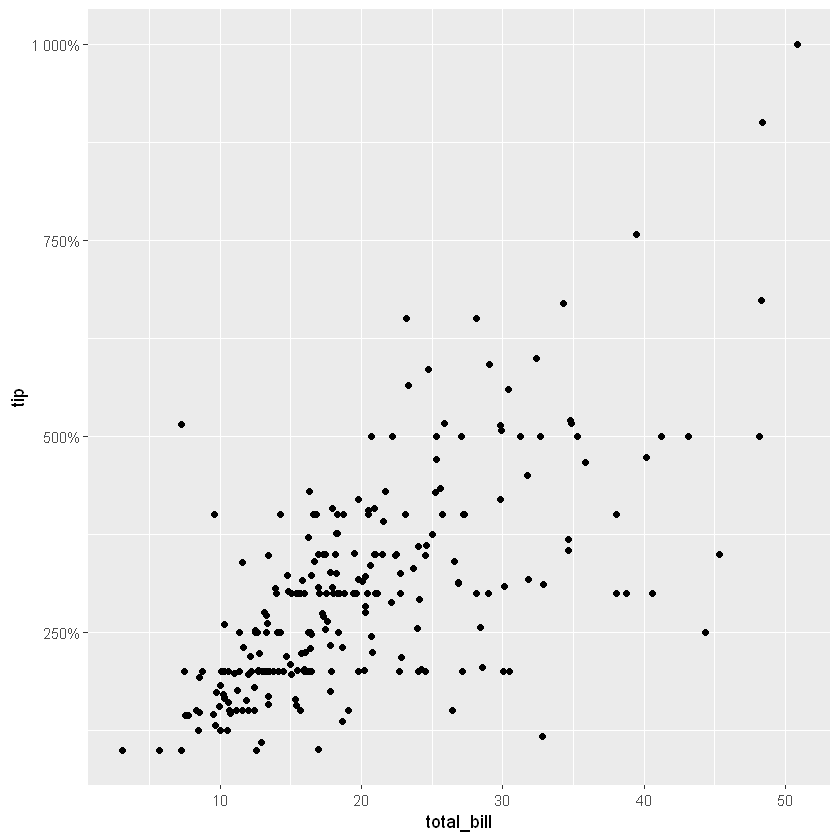

In [11]:
# Typically you'll pass a function to the `labels` argument: Like FuncFormatter in MATPLOTLIB
# Some common formats are built into the scales package:

plot + scale_y_continuous(labels = scales::percent)

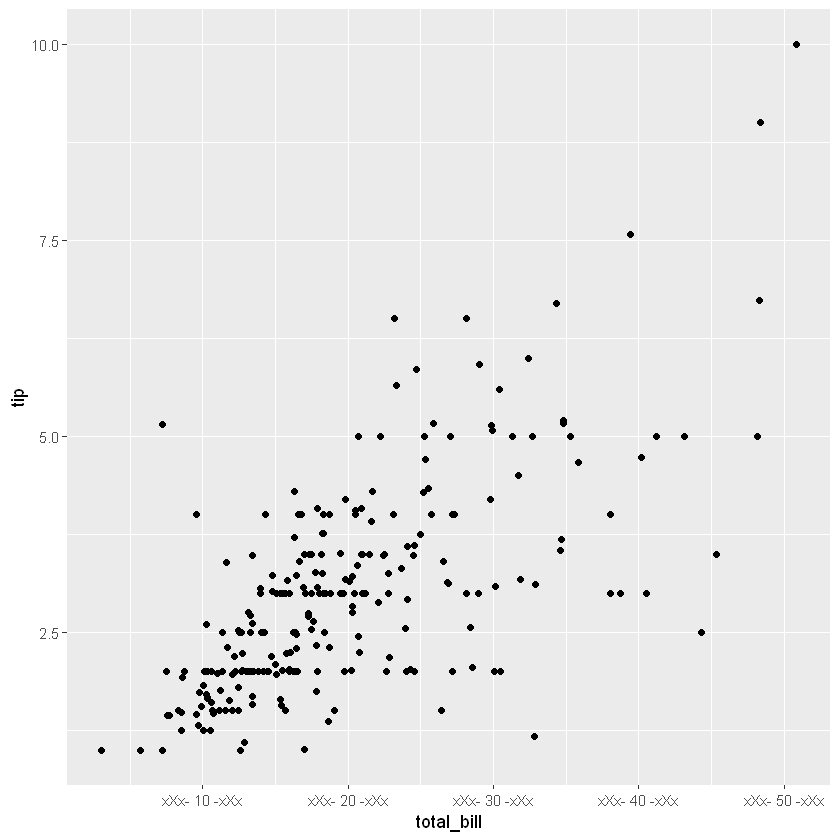

In [12]:
#FuncFormatter
plot + scale_x_continuous(labels = function(v) paste('xXx-', v, '-xXx'))

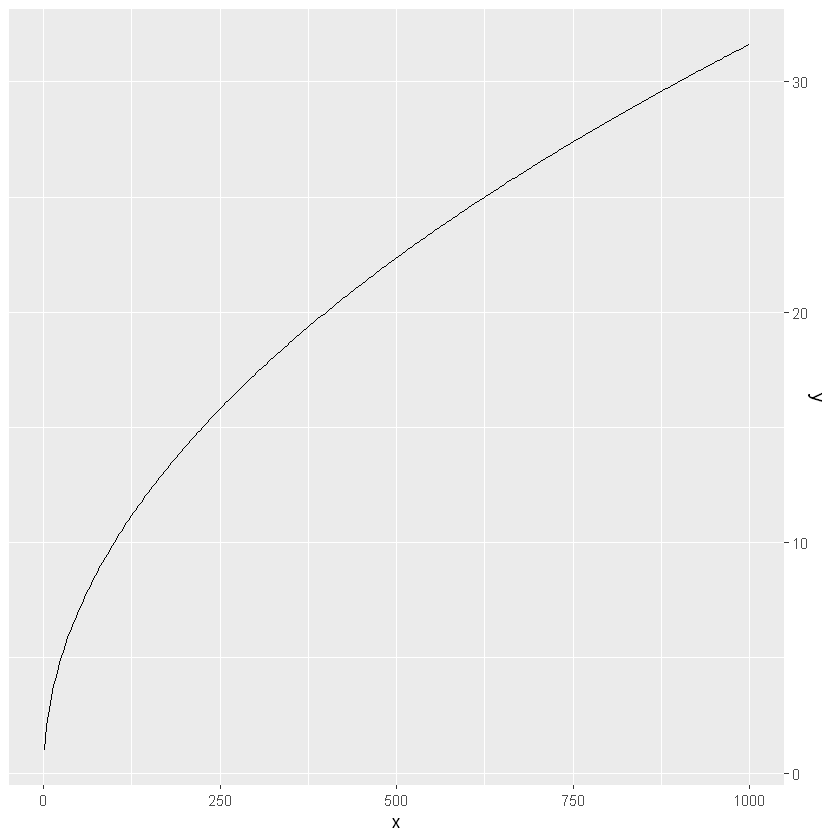

In [20]:
#place y axis on the right
plot + scale_y_continuous(position = 'right')

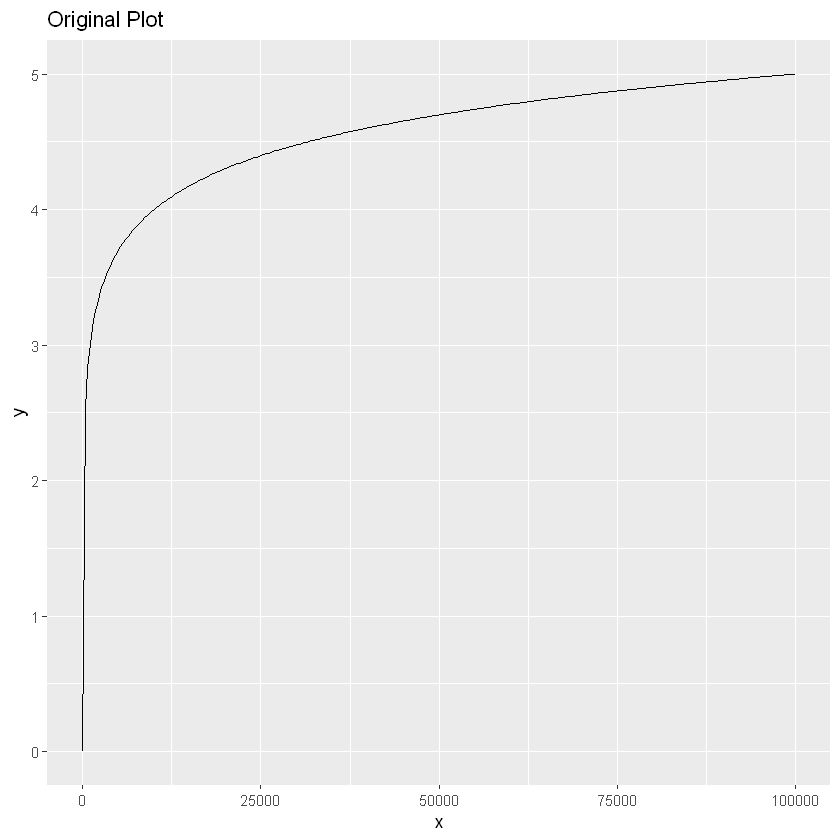

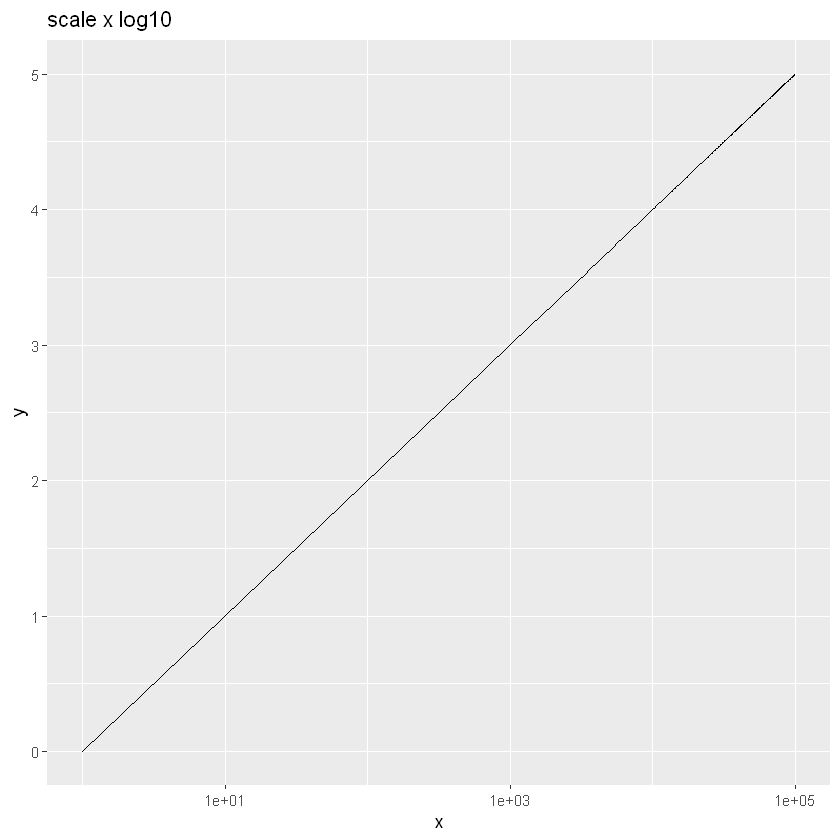

In [13]:
x <- seq(1, 100000, length.out = 300)
y <- log10(x)
exp10_curve <- data.frame(x, y)
# You can also override the default linear mapping by using a
# transformation. There are three shortcuts:
plot <- ggplot(exp10_curve, aes(x, y)) + geom_line()

plot + labs(title = 'Original Plot')

#using log10 scale, the curve now looks like a line
plot + labs(title = 'scale x log10') + scale_x_log10()

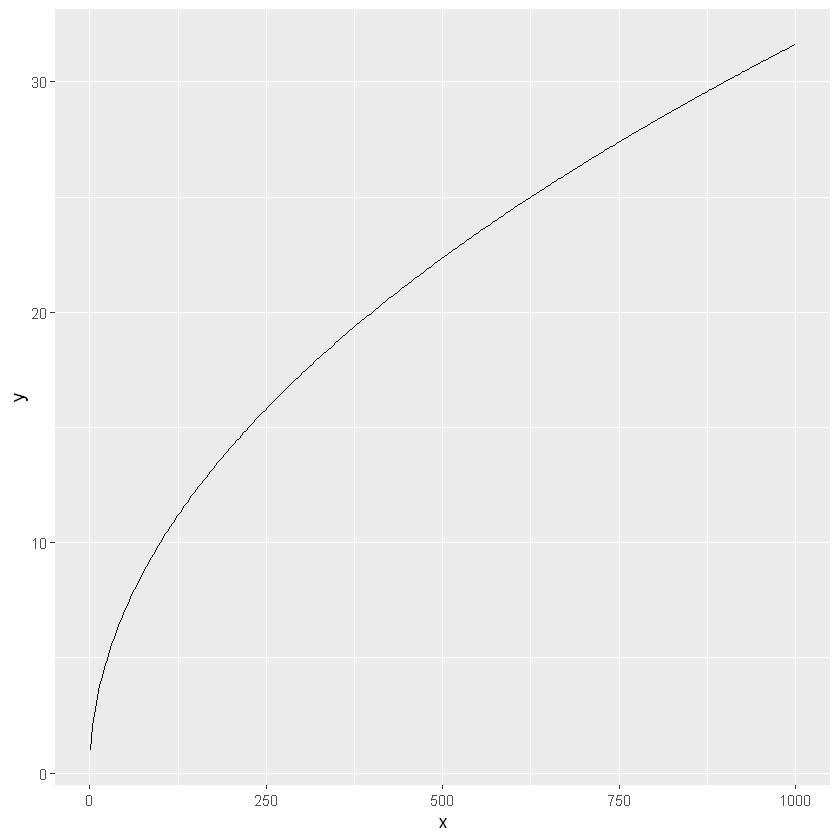

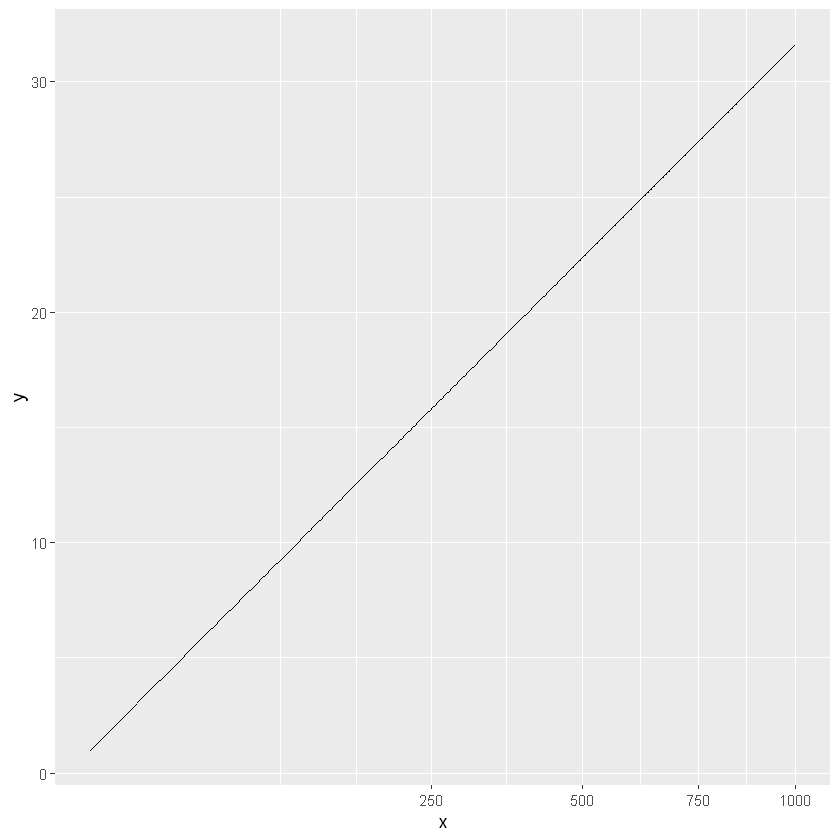

In [14]:
x <- seq(1, 1000, length.out = 300)
y <- sqrt(x)
sqrt_curve <- data.frame(x, y)

plot <- ggplot(sqrt_curve, aes(x, y)) + geom_line()

plot
#use sqrt x axis, the sqrt curve turns into a line
plot + scale_x_sqrt()

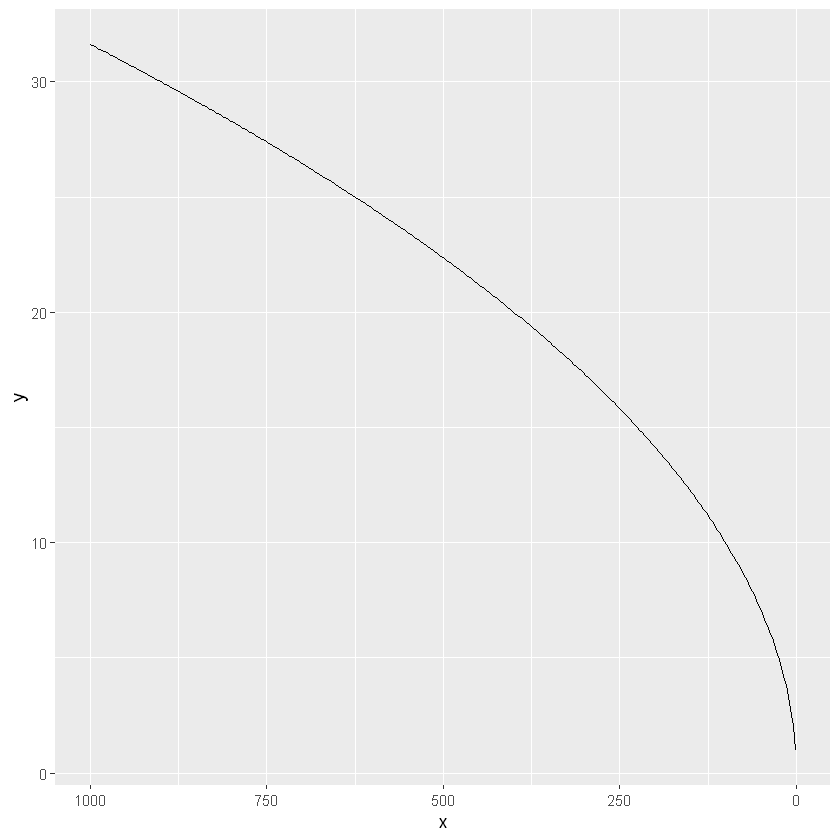

In [15]:
#reverse x axis
plot + scale_x_reverse()

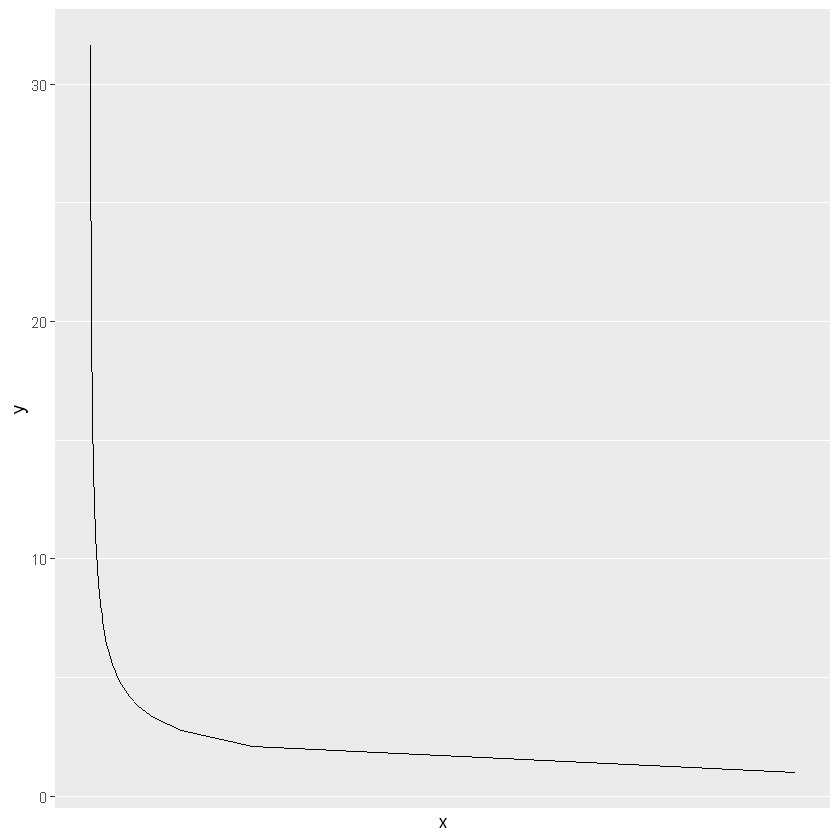

In [16]:
# Or you can supply a transformation in the `trans` argument:
plot + scale_x_continuous(trans = scales::reciprocal_trans())

In [17]:
#log 2 scale
scale_x_continuous(trans = 'log2')